# Total and New COVID-19 cases in NYC

**Data source:** New York City Health Department's "2019 Novel Coronavirus (COVID-19) Daily Data Summary": https://www1.nyc.gov/assets/doh/downloads/pdf/imm/covid-19-daily-data-summary.pdf

## Import dependencies

In [11]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd

## Define Data

In [12]:
data = [
    ['2020-03-01',     1],
    ['2020-03-02',     1],
    ['2020-03-03',     2],
    ['2020-03-04',     2],
    ['2020-03-05',     4],
    ['2020-03-06',     7],
    ['2020-03-07',    12],
    ['2020-03-08',    14],
    ['2020-03-09',    25],
    ['2020-03-10',    32],
    ['2020-03-11',    53],
    ['2020-03-12',    88],
    ['2020-03-13',   137],
    ['2020-03-14',   185],
    ['2020-03-15',   269],
    ['2020-03-16',   464],
    ['2020-03-17',   923],
    ['2020-03-18',  2009],
    ['2020-03-19',  3954],
    ['2020-03-20',  5683]
]

df = pd.DataFrame({
    'date': [row[0] for row in data],
    'total_cases': [row[1] for row in data]
})

df['new_cases'] = [df['total_cases'].iloc[0]] + \
    list(df['total_cases'].iloc[1:].values - df['total_cases'].iloc[0:-1].values)

df

,date,total_cases,new_cases
0,2020-03-01,1,1
1,2020-03-02,1,0
2,2020-03-03,2,1
3,2020-03-04,2,0
4,2020-03-05,4,2
5,2020-03-06,7,3
6,2020-03-07,12,5
7,2020-03-08,14,2
8,2020-03-09,25,11
9,2020-03-10,32,7


In [13]:
# Define a function to create the date labels to show in the plot
def date_labels(dates):
    first_label = dates[0].strftime("%#d\n%b\n%Y")
    last_label = dates[len(dates)-1].strftime("%#d\n%b\n%Y")
    labels = [first_label]
    for i in range(1, len(dates) - 1):
        label = dates[i].strftime("%#d")
        if dates[i].month != dates[i-1].month:
            label = label + dates[i].strftime("\n%b")
        labels.append(label)
    labels.append(last_label)
    return labels

df['date_obj'] = df['date'].map(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

df['date_label'] = date_labels(df['date_obj'])

df

,date,total_cases,new_cases,date_obj,date_label
0,2020-03-01,1,1,2020-03-01,1\nMar\n2020
1,2020-03-02,1,0,2020-03-02,2
2,2020-03-03,2,1,2020-03-03,3
3,2020-03-04,2,0,2020-03-04,4
4,2020-03-05,4,2,2020-03-05,5
5,2020-03-06,7,3,2020-03-06,6
6,2020-03-07,12,5,2020-03-07,7
7,2020-03-08,14,2,2020-03-08,8
8,2020-03-09,25,11,2020-03-09,9
9,2020-03-10,32,7,2020-03-10,10


## Create Plots To Use

### Line plot (matplotlib)

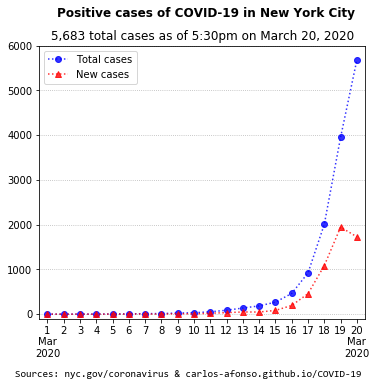

In [14]:
fig = plt.figure(figsize=(5.5, 5.5))

plt.plot(df['date_label'], df['total_cases'], 'bo:', alpha=0.8, label='Total cases')
plt.plot(df['date_label'], df['new_cases'], 'r^:', alpha=0.8, label='New cases')

plt.xlim(-0.5, len(df)-0.5)
plt.ylim(-100, 6000)

plt.grid(axis='y', linestyle=':')

plt.suptitle('Positive cases of COVID-19 in New York City', x=0.53, fontweight='bold') #fontsize=14
plt.title('5,683 total cases as of 5:30pm on March 20, 2020')

text = 'Sources: nyc.gov/coronavirus & carlos-afonso.github.io/COVID-19'
plt.text(-2, -1400, text, fontfamily='Consolas')

plt.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [16]:
# Save figure as SVG and PNG images
file_path = '../images/nyc-covid-19-cases-total-and-new-line'
fig.savefig(file_path + '.svg')
fig.savefig(file_path + '.png', dpi=200)

## Other Possible Plots

### Bar plot (pandas)

The line plot (above) seems better than the bar plot.

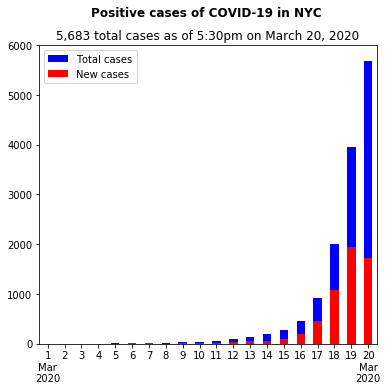

In [6]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))

df.plot(x='date_label', y='total_cases', kind='bar', color='blue', label='Total cases', ax=ax, rot=0)
df.plot(x='date_label', y='new_cases', kind='bar', color='red', label='New cases', ax=ax, rot=0)

plt.ylim(0, 6000)

plt.xlabel('')

plt.suptitle('Positive cases of COVID-19 in NYC', x=0.53, fontweight='bold') #fontsize=14
plt.title('5,683 total cases as of 5:30pm on March 20, 2020')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Line plot (pandas)

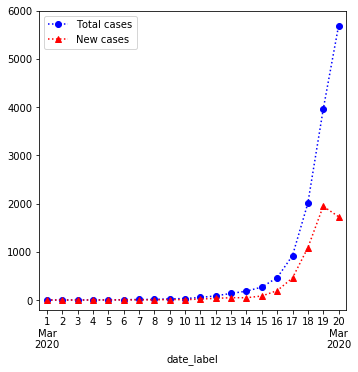

In [9]:
fig, ax = plt.subplots(figsize=(5.5, 5.5))

df.plot(x='date_label', y='total_cases', style='bo:', label='Total cases', ax=ax, rot=0)
df.plot(x='date_label', y='new_cases', style='r^:', label='New cases', ax=ax, rot=0)

plt.xticks(range(len(df)), df['date_label'])

plt.xlim(-0.5, len(df)-0.5)
plt.ylim(-200, 6000)

plt.show()

## Bar plot (matplotlib)

The pandas bar plot looks better.

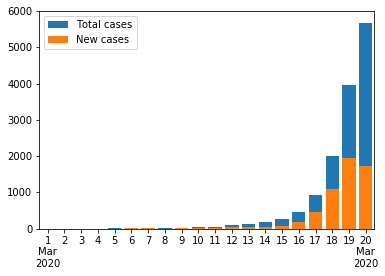

In [10]:
fig = plt.figure()

plt.bar(df['date_label'], df['total_cases'], label='Total cases')
plt.bar(df['date_label'], df['new_cases'], label='New cases')

plt.xlim(-0.5, len(df)-0.5)
plt.ylim(0, 6000)

plt.legend()
plt.show()